<a href="https://colab.research.google.com/github/sangjin94/itwill-python/blob/main/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Machine Learning(기계 학습)
    * 지도학습(Superivised Learning): 레이블이 있는 데이터를 학습
        * 분류(Classification): 클래스 분류
        * 회귀(Regression): 숫자 예측
    * 비지도학습(Unsupervised Learning): 레이블이 없는 데이터를 학습
    * 강화학습(Reinforcement Learning): 보상/벌칙을 통해서 학습

# Objectives

Fish 데이터 셋에서 농어(Perch)의 무게(Weight)를 예측

* 농어의 길이(Length)로만 무게 예측 - KNN, Linear Regression
* 농어의 여러가지 특성들(Length, Diagonal, Height, Width)로 무게 예측 - Linear Regression

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # ML 모델
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비

In [ ]:
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [ ]:
# fish DataFrame에서 'Perch'(농어) 어종만 선택
perch = fish[fish.Species == 'Perch']

In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


농어의 길이(Length)를 알면 무게(Weight) 예측할 수 있을까?

* 독립변수(feature) - Length
* 종속변수(label, target) - Weight

In [ ]:
# 종속변수
perch_weight = perch['Weight'].values
perch_weight  # label은 1d array

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [ ]:
# 독립변수
perch_length = perch[['Length']].values
perch_length  # feature는 2d array

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

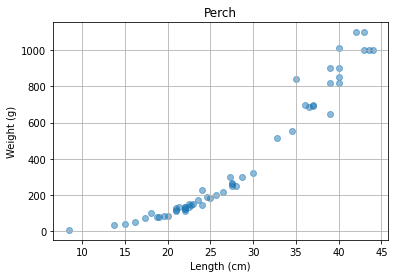

In [ ]:
# Weight ~ Length scatter plot
plt.scatter(perch_length, perch_weight, alpha=0.5)
plt.title('Perch')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid()
plt.show()

In [ ]:
# X: 특성 행렬(2d array), y: 타겟 벡터(1d array)
X = perch_length.copy()
y = perch_weight.copy()

In [ ]:
X.shape, y.shape

((56, 1), (56,))

# Train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)
# shuffle=True(default): random sampling이 기본값

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42, 1), (14, 1), (42,), (14,))

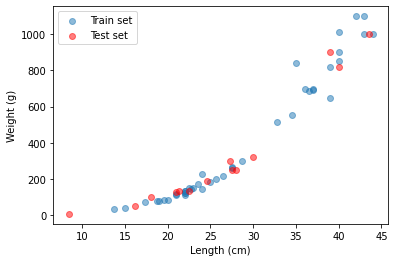

In [ ]:
# train/test set 시각화
plt.scatter(X_train, y_train, label='Train set', alpha=0.5)
plt.scatter(X_test, y_test, label='Test set', alpha=0.5, color='red')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# KNN Regressor 모델 훈련, 평가

KNN Regressor: 가장 가까운 k개의 이웃들의 레이블(타겟)의 평균값으로 숫자를 예측.

In [ ]:
knn_reg = KNeighborsRegressor()  # k=5인 KNN 모델 생성

In [ ]:
knn_reg.fit(X_train, y_train)  # 모델 훈련

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
train_pred = knn_reg.predict(X_train)  # train set의 예측값
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [ ]:
y_train  # train set의 실젯값

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [ ]:
# MSE(Mean Squared Errors): 오차 제곱의 평균
# RMSE(Root Mean Squared Errors): 오차 제곱의 평균의 제곱근
print('MSE:', mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, train_pred)))

MSE: 3716.5161904761903
RMSE: 60.96323638453089


In [ ]:
# MAE(Mean Absolute Errors): 오차 절대값의 평균
mean_absolute_error(y_train, train_pred)

35.76190476190476

일반적인 평가 지표는 점수가 높을 수록 좋은 모델, 점수가 낮을 수록 나쁜 모델.

그런데, 회귀 문제에서는 오차는 작을 수록 좋은 모델이고, 오차가 클 수록 나쁜 모델.

회귀에서도 점수가 높을 수록(1에 가까울 수록) 좋은 모델이고, 점수 낮을 수록 나쁜 모델로 평가할 수 있는 지표 개발 ---> $R^2$ score

In [ ]:
# R^2 score(결정 계수): 1에 가까울 수록 오차가 적은 모델, 더 좋은 모델.
r2_score(y_train, train_pred)

0.9698823289099254

* $ y_i $ : $i$번째 샘플의 실젯값(label)
* $ \hat{y_i} $ : $i$번째 샘플의 예측값
* $ \bar{y} $ : 타겟의 평균값
* $ n $ : 샘플 개수

* MAE(Mean Absolute Errors)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* MSE(Mean Squared Errors)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

* RMSE(Root Mean Squared Errors)
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

* $ R^2 $ score(Coefficient of determinant, 결정 계수)
$$
R^2 = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

In [ ]:
# 테스트 셋의 결정 계수(R^2 score)
test_pred = knn_reg.predict(X_test)
r2_score(y_test, test_pred)
#> train set R^2 < test set R^2: 과소적합(underfitting)

0.992809406101064

# k값에 따른 $R^2$ 시각화

In [ ]:
train_scores = []  # train set의 결정 계수들을 저장할 리스트
test_scores = []  # test set의 결정 계수들을 저장할 리스트

k_values = np.arange(1, 11)
# 1 ~ 10까지 k값에 따라서 반복
    # 모델 생성
    # 모델 훈련
    # 훈련 셋 평가 점수 계산, 저장
    # 테스트 셋 평가 점수 계산, 저장
# 평가 점수 시각화